In [1]:
# ARIMA :

# IMPORTS :

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

<ipython-input-1-a87bca50c490>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# DATABASE :

data = pd.read_csv('DATABASE.txt', sep=";", header=None, na_values=['?'])

data = data[:100]

data = data.rename(columns=data.iloc[0]).drop(data.index[0])

data["Time_index2"] = data["Date"] + " " + data["Time"]

data["timestamp"] = pd.to_datetime(data['Time_index2'], format='%d/%m/%Y %H:%M:%S')
data.set_index(['timestamp'],inplace=True)

data["Global_active_power"] = data["Global_active_power"].astype(float)

df = pd.DataFrame(data, columns=['Global_active_power'])

df = df.rename(columns={'Global_active_power': 'Y'})


series = df

C:\Users\bapti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
"""
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

"""

"\n# fit model\nmodel = ARIMA(series, order=(5,1,0))\nmodel_fit = model.fit()\n# summary of fit model\nprint(model_fit.summary())\n# line plot of residuals\nresiduals = DataFrame(model_fit.resid)\nresiduals.plot()\npyplot.show()\n# density plot of residuals\nresiduals.plot(kind='kde')\npyplot.show()\n# summary stats of residuals\nprint(residuals.describe())\n\n"

<ipython-input-4-ed61f489e6a0>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=2.378145, expected=2.920000
predicted=2.814598, expected=2.930000
predicted=3.144282, expected=2.912000
predicted=3.252461, expected=2.608000
predicted=2.917733, expected=2.714000
predicted=2.830306, expected=3.538000
predicted=3.746634, expected=6.072000
predicted=6.686414, expected=4.536000
predicted=3.838470, expected=4.408000
predicted=4.103573, expected=2.912000
predicted=2.461825, expected=2.326000
predicted=2.048094, expected=2.264000
predicted=2.919439, expected=2.270000
predicted=2.643872, expected=2.258000
predicted=2.644072, expected=2.188000
predicted=2.292521, expected=2.978000
predicted=3.113099, expected=4.200000
predicted=4.350813, expected=4.204000
predicted=3.991125, expected=4.218000
predicted=3.915796, expected=2.786000
predicted=2.217465, expected=2.540000
predicted=2.374797, expected=2.496000
predicted=2.764575, expected=2.336000
predicted=2.584988, expected=2.322000
predicted=2.634760, expected=2.448000
predicted=2.546165, expected=4.298000
predicted=4.

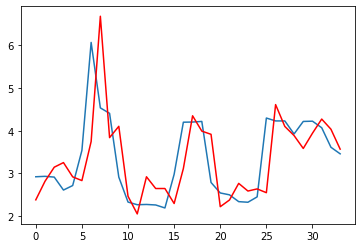

In [4]:
# evaluate an ARIMA model using a walk-forward validation

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt



# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()